In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page=1')

In [11]:
temp_df = pd.DataFrame(response.json()['results'])[['id','overview','popularity','release_date','title','vote_average','vote_count']]

In [12]:
temp_df.head()

,id,overview,popularity,release_date,title,vote_average,vote_count
0,238,"Spanning the years 1945 to 1955, a chronicle o...",86.826,1972-03-14,The Godfather,8.7,16771
1,278,Framed in the 1940s for the double murder of h...,71.716,1994-09-23,The Shawshank Redemption,8.7,22493
2,240,In the continuing saga of the Corleone crime f...,51.901,1974-12-20,The Godfather Part II,8.6,10160
3,424,The true story of how businessman Oskar Schind...,50.009,1993-12-15,Schindler's List,8.6,13354
4,19404,"Raj is a rich, carefree, happy-go-lucky second...",23.951,1995-10-19,Dilwale Dulhania Le Jayenge,8.6,3915


In [13]:
df = pd.DataFrame()

In [14]:
df

""


In [15]:
for i in range(1,499):
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page={}'.format(i))
    temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]
    df=df.append(temp_df,ignore_index=True)

In [16]:
df

,id,title,overview,release_date,popularity,vote_average,vote_count
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,86.826,8.7,16771
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,71.716,8.7,22493
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,51.901,8.6,10160
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,50.009,8.6,13354
4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-19,23.951,8.6,3915
...,...,...,...,...,...,...,...
9955,11918,Superhero Movie,The team behind Scary Movie takes on the comic...,2008-03-28,16.958,5.2,1469
9956,134375,Home Alone: The Holiday Heist,8-year-old Finn is terrified to learn his fami...,2012-11-25,17.017,5.2,333
9957,282813,The Pyramid,An archaeological team attempt to unlock the s...,2014-12-04,18.108,5.2,859
9958,243688,Poltergeist,A family's suburban home is invaded by angry s...,2015-05-20,45.870,5.2,2035


In [17]:
df.to_csv('movies.csv')

In [18]:
df.describe()

,id,popularity,vote_average,vote_count
count,9960.000000,9960.000000,9960.000000,9960.000000
mean,166479.806526,29.333325,6.669478,1583.679618
std,217839.588982,96.625874,0.717436,2705.601082
min,3.000000,0.600000,5.200000,200.000000
25%,10146.500000,9.955750,6.100000,319.000000
50%,31189.000000,13.874500,6.600000,595.000000
75%,323296.000000,24.424250,7.200000,1503.000000
max,985939.000000,4845.496000,8.700000,32458.000000


In [19]:
reader = pd.read_csv('movies.csv')

In [20]:
reader

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,86.826,8.7,16771
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,71.716,8.7,22493
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,51.901,8.6,10160
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,50.009,8.6,13354
4,4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-19,23.951,8.6,3915
...,...,...,...,...,...,...,...,...
9955,9955,11918,Superhero Movie,The team behind Scary Movie takes on the comic...,2008-03-28,16.958,5.2,1469
9956,9956,134375,Home Alone: The Holiday Heist,8-year-old Finn is terrified to learn his fami...,2012-11-25,17.017,5.2,333
9957,9957,282813,The Pyramid,An archaeological team attempt to unlock the s...,2014-12-04,18.108,5.2,859
9958,9958,243688,Poltergeist,A family's suburban home is invaded by angry s...,2015-05-20,45.870,5.2,2035


In [22]:
reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9960 non-null   int64  
 1   id            9960 non-null   int64  
 2   title         9960 non-null   object 
 3   overview      9954 non-null   object 
 4   release_date  9960 non-null   object 
 5   popularity    9960 non-null   float64
 6   vote_average  9960 non-null   float64
 7   vote_count    9960 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 622.6+ KB


In [25]:
reader.head(2)

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,86.826,8.7,16771
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,71.716,8.7,22493


In [34]:
reader.drop(['Unnamed: 0','overview'],axis =1,inplace = True)
print("After Removing Unused Columns (Rows,Columns) : ",reader.shape)

After Removing Unused Columns (Rows,Columns) :  (9960, 6)


In [35]:
reader.head()

,id,title,release_date,popularity,vote_average,vote_count
0,238,The Godfather,1972-03-14,86.826,8.7,16771
1,278,The Shawshank Redemption,1994-09-23,71.716,8.7,22493
2,240,The Godfather Part II,1974-12-20,51.901,8.6,10160
3,424,Schindler's List,1993-12-15,50.009,8.6,13354
4,19404,Dilwale Dulhania Le Jayenge,1995-10-19,23.951,8.6,3915


release_date
2022-09-27    1
2022-09-28    1
2022-09-30    2
2022-10-05    1
2022-10-12    1
Name: id, dtype: int64


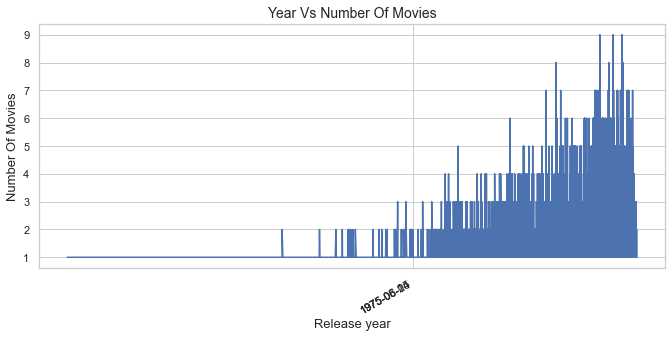

In [82]:
data=reader.groupby('release_date').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
reader.groupby('release_date').count()['id'].plot(xticks = np.arange(1960,2016,20))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

In [79]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = reader[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = reader[x].idxmax()
    high = pd.DataFrame(reader.loc[high_index,:])
    low = pd.DataFrame(reader.loc[min_index,:])
    
    return pd.concat([high,low],axis = 1)

#find the movie with most and least votes.
find_minmax('vote_average')

,0,9890
id,238,77948
title,The Godfather,The Cold Light of Day
release_date,1972-03-14 00:00:00,2012-04-04 00:00:00
popularity,86.826,11.334
vote_average,8.7,5.2
vote_count,16771,744
